# <span style="color:darkred">Act Report for Project 2 - Wrangle and Analyse Data</span>
by Kudakwashe Verah

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import requests
import tweepy as tweepy
import json
from tweepy.parsers import JSONParser

import time
import re

from IPython.display import Image

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_twitter_master = pd.read_csv('twitter_archive_master.csv')

In the report below, I will be sharing on my insights and the visualisations that I made from my analysis of the master dataset that I made after cleaning and merging the initial datasets.

## <span style="color:darkred">The Most Retweeted and Liked Tweet, plus it's Photo!</span>
***
Twitter's @WeRateDogs has amassed a huge following from a global audience who simply adore their four-legged canine companions. The channel posts pictures of different breeds of dogs being delightfully amusing and cute at the same time, which no one knew was possible, but the four-legged buddies seem to have cracked the code on that.

Each post is accompanied by a brief description of the dog's stage, be it a doggo, floofer, pupper or puppo and explains whatever playful shenanigans they were engaged in when the 'evidence' was captured on camera. The 'celebrity' doggo, whose name we sadly don't have but can call 'Tina' (after the person who submitted the image), if you like, then receives a rating that can be anything above zero to a whooping 1776 out of 10; imagine that!

I know some people that wish they could get such ratings, or maybe at least the same number of retweets as the most popular photo posted by the channel -- it had a staggering <span style="color:darkred">70,276 retweets and 144,065 likes!</span>

_We were able to determine these values using lines of code to find the maximum retweet and favourite counts, then we indexed the rows with these maximum values using the query function. We then used the requests library to download and save the image from the <span style="color:darkred">jpg__url</span> column so we could display it easily._

Check out the famous doggo that's making headlines because he can stand in water:

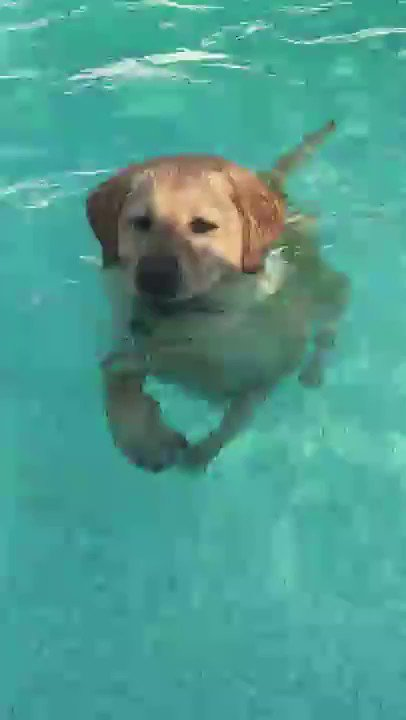

In [3]:
Image(filename = 'most_liked_image.jpg')

The tweet accompanying this little doggo reads as follows:

<div class="alert alert-block alert-info"> <b>
<b>"Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4."</b>
</div>

## <span style="color:darkred">The Most Common Dog Stage</span>
***
As we've already seen with our initial two insights, the seemingly most popular dog is a <span style="color:darkred">doggo</span>, since it received the most likes and retweets. Looking at the data below, we can clearly see that the most common dog is a <span style="color:darkred">pupper with 224 of them as compared to the 75 doggos.</span>

In [4]:
df_twitter_master.groupby('stage').size().sort_values()

stage
doggo_floofer      1
puppo_doggo        1
floofer            9
doggo_pupper      10
puppo             24
doggo             75
pupper           224
dtype: int64

One could possibly infer that since they aren't as common as a pupper, for example, their two-legged mammal friends appreciate them more, but I think it's because they just want that doggo to teach to stand on all fours and still have their head pop above the water.

## <span style="color:darkred">Does a Higher Rating Mean More Likes?</span>
***
One would assume this would be the case but it's not quite. It appears a perfect 10 is a <span style="color:darkred">13.5/10</span> as shown in the graph below. If you want your dog to trend, give them a rating in the region of 13 - 14 out of 10 (remember Tina only had 13/10 and she's pretty much royalty).

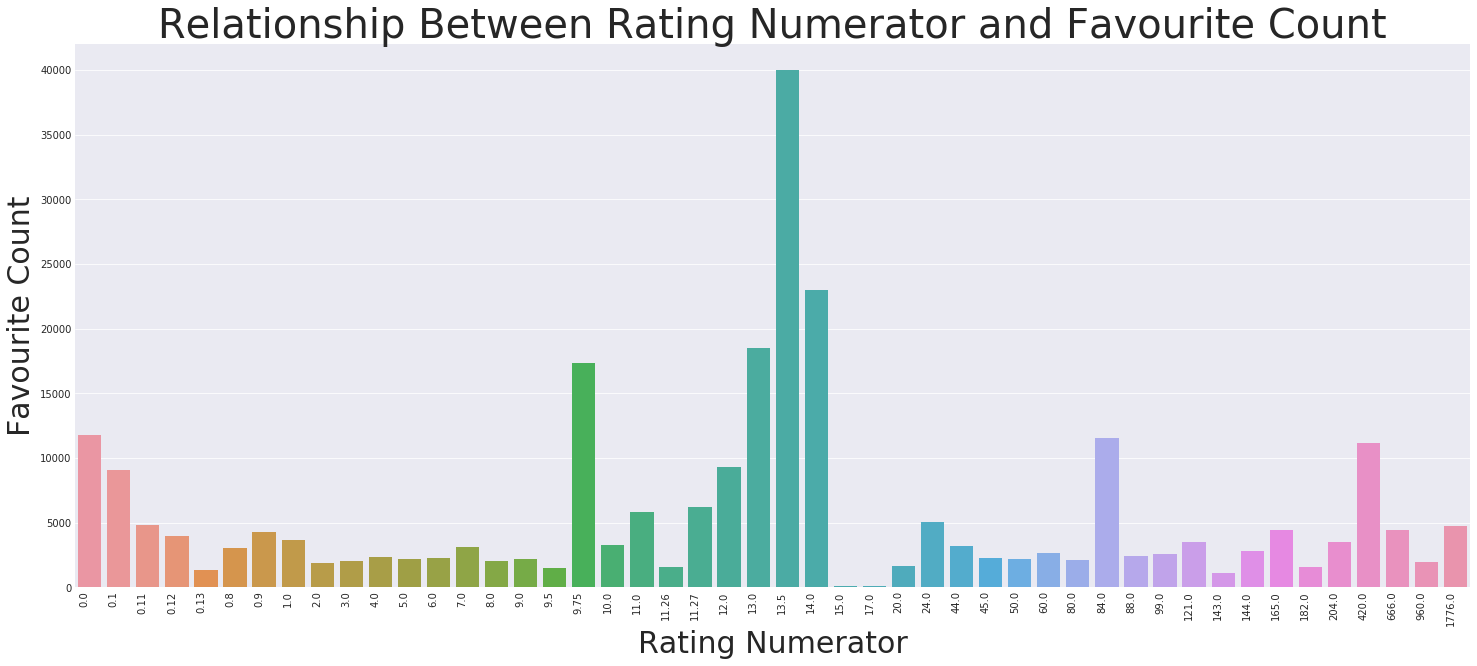

In [5]:
"""
Create a new dataframe with only the columns that we require
for this visual analysis and then plot the graph.
"""
# set plot style
sns.set_style('darkgrid')

# create dataframe of columns that we need
df_viz_1 = df_twitter_master[['rating_numerator', 'favourite_count']]

# set figure size
fig, viz_1 = plt.subplots(figsize = (25, 10))

# plot barplot and lineplot
viz_1 = sns.barplot('rating_numerator', 'favourite_count', data = df_viz_1, ci = None)

# set xlabel and size
viz_1.set_xlabel('Rating Numerator', size = 30)

# set ylabel and size
viz_1.set_ylabel('Favourite Count', size = 30)

# set title label and size
viz_1.set_title('Relationship Between Rating Numerator and Favourite Count', size = 40)

# adjust x axis ticklabels 90 degrees
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation = 90, horizontalalignment= 'right')

# save the plot
plt.savefig('relationship-between-rating-numerator-and-fav-count.jpg')

Tweets with a rating of <span style="color:darkred">13.5/10</span> had about <span style="color:darkred">40000 likes</span> whilst tweets with a rating of <span style="color:darkred">1776/10 only had 5000 likes.</span> This is a percentage difference of 87.5% which is massive.

## <span style="color:darkred">More Retweets = More Likes</span>
***
This final visualisation shows us the correlation between the <span style="color:darkred">retweet_count and favourite_count</span> parameters of our dataset.

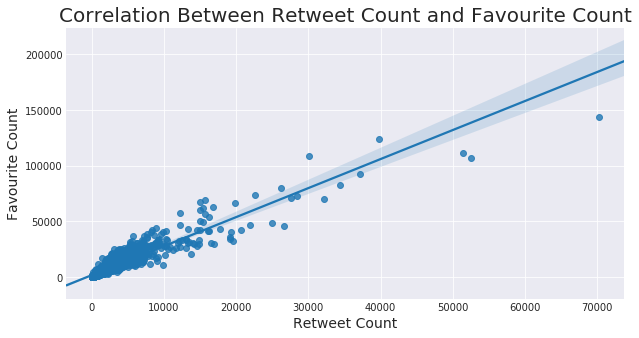

In [6]:
"""
We will create a new dataframe with only the columns that we require 
for this visual analysis then we will plot the chart.
"""
# set plot style
sns.set_style('darkgrid')

# create dataframe of columns that we need
df_viz_2 = df_twitter_master[['retweet_count', 'favourite_count']]

# set figure size
fig, viz_2 = plt.subplots(figsize = (10, 5))

# plot barplot and lineplot
viz_2 = sns.regplot('retweet_count', 'favourite_count', data = df_viz_2)

# set xlabel and size
viz_2.set_xlabel('Retweet Count', size = 14)

# set ylabel and size
viz_2.set_ylabel('Favourite Count', size = 14)

# set title label and size
viz_2.set_title('Correlation Between Retweet Count and Favourite Count', size = 20)

# save the plot
plt.savefig('correlation-between-retweet-count-and-fav-count.jpg')

_For this visualisation, we used the seaborn dark grid style so that we could have a dark background against which to easily observe our data on the plots. We plotted a regression plot from where we were able to get a best fit line, which clearly indicates a positive correlation between the <span style="color:darkred">retweet__count and the favourite__count</span>._

This graph can allow us to make inference with some caution that once a tweet has been a fairly large number of tweets, it will also have a large of corresponding likes.
***